Spam Email Prediction- Logical Regression

Import Libraries

In [ ]:
#import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Create Dataframe

In [ ]:
#read csv file
emails = pd.read_csv('emails.csv')

In [ ]:
#create dataframe
df = pd.DataFrame(data = emails, columns = emails.columns)
df = df.rename(columns={'Prediction': 'Target'})

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Target
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Target
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Cleaning

In [ ]:
df.isna().sum().sum()

37

In [ ]:
#dropping email no. column since it is the only object type and has nothing to do with predicting the target
df = df.drop('Email No.', axis=1)

In [ ]:
#dropped NaN values
df = df.dropna()

Logistic Regression

In [ ]:
#train test split
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
#splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
logreg = LogisticRegression(solver='liblinear', max_iter =1000)  #find a solver

#10 fold cross validation
cross_val = cross_validate(logreg, X_train, y_train.values.ravel(), cv=10)

logreg.fit(X_train, y_train)
# Predictions on the test set
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Extracting Sensitivity, Specificity, and F1 Score from the classification report
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Precision: [0.98365123 0.94352159]
Recall: [0.97699594 0.95945946]
F1 Score: [0.98031229 0.95142379]
Support: [739 296]


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.94      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



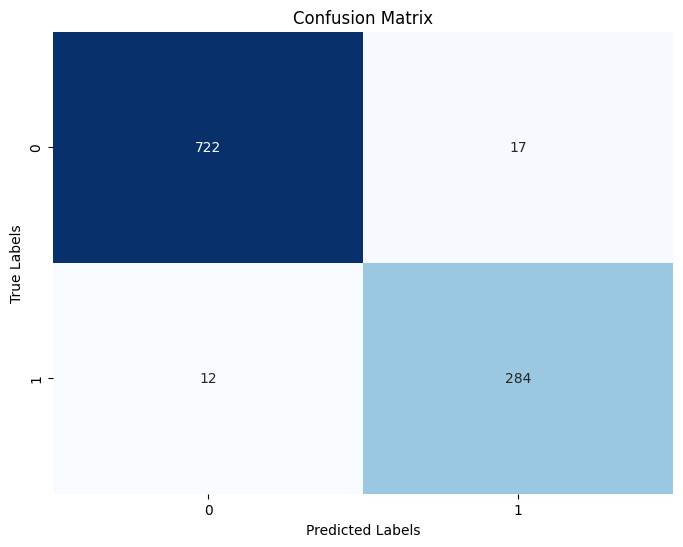

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

29/1035 = 0.028


1-0.028 = 0.972



97.2% Accuracy

0 = Non Spam
1 = Spam



Model predict 739 Non-spam and 296 Spam